# **Zomato Analysis in Bengaluru**

# Importing some libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot
# To ignore warnings
from warnings import filterwarnings
filterwarnings('ignore')

# *Reading the dataset*

In [7]:
#read dataset
df=pd.read_csv('zomato.csv.zip')
df.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table   rate  votes                             phone  \
0          Yes        Yes  4.1/5    775    080 42297555\r\n+91 9743772233   
1          Yes         No  4.1/5    787                      080 41714161   
2          Yes         No  3.8/5    918                    +91 9663487993   
3           No         No  3.7/5     88                    +91 9620009302   
4           No         No  3.8/5    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                         800   
1     Chinese, North Indian, Thai                         800   
2          Cafe, Mexican, Italian                         800   
3      South Indian, North Indian                         300   
4        North Indian, Rajasthani                         600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

In [8]:
df.shape

(51717, 17)

In [9]:
df.dtypes

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [10]:
len(df['name'].unique())

8792

In [11]:
df.isna().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

# *Data Cleaning*

#### getting all NAN features

In [14]:
feature_na=[feature for feature in df.columns if df[feature].isnull().sum()>0] #it gives you all the columns that contains some null values
feature_na

['rate',
 'phone',
 'location',
 'rest_type',
 'dish_liked',
 'cuisines',
 'approx_cost(for two people)']

In [15]:
# this gives you the percentage of missing values
for feature in feature_na:
    print('{} has {} % missing values'.format(feature,np.round(df[feature].isnull().sum()/len(df)*100,4)))

rate has 15.0337 % missing values
phone has 2.3358 % missing values
location has 0.0406 % missing values
rest_type has 0.4389 % missing values
dish_liked has 54.2916 % missing values
cuisines has 0.087 % missing values
approx_cost(for two people) has 0.669 % missing values


In [16]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [17]:
df.dropna(axis='index',subset=['rate'],inplace=True) #dropping the missing values 

In [18]:
df.shape

(43942, 17)

In [19]:
def split(x): #defining a split function so that we can remove /5 in rating
    return x.split('/')[0]

In [20]:
df['rate']=df['rate'].apply(split)

In [21]:
df.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table rate  votes                             phone  \
0          Yes        Yes  4.1    775    080 42297555\r\n+91 9743772233   
1          Yes         No  4.1    787                      080 41714161   
2          Yes         No  3.8    918                    +91 9663487993   
3           No         No  3.7     88                    +91 9620009302   
4           No         No  3.8    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                         800   
1     Chinese, North Indian, Thai                         800   
2          Cafe, Mexican, Italian                         800   
3      South Indian, North Indian                         300   
4        North Indian, Rajasthani                         600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

In [22]:
df['rate'].unique() #still we are getting NEW and - 

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NEW', '2.9', '3.5',
       '2.6', '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2',
       '2.3', '3.4 ', '-', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ',
       '3.7 ', '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ', '2.5 ',
       '3.2 ', '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1', '2.0', '1.8',
       '4.6 ', '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ',
       '2.2 ', '2.0 ', '1.8 '], dtype=object)

In [23]:
df.replace(['NEW', '-'],0,inplace=True) #we are replacing NEW and - with 0

In [24]:
df['rate']=df['rate'].astype(float) #changing the datatype of rate from object to float

## Calculating Average Rating of each Restaurant

<Axes: xlabel='name'>

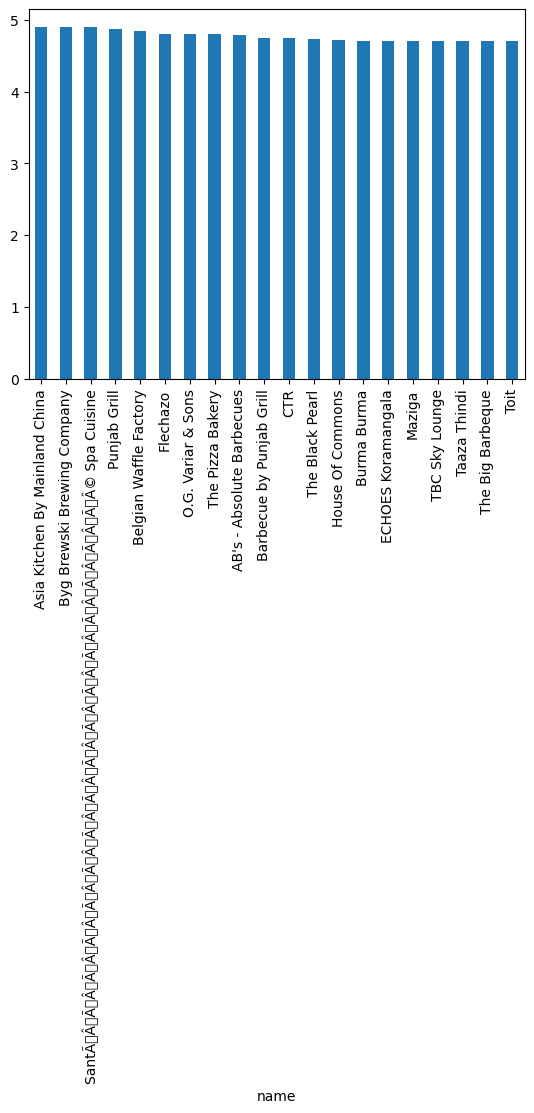

In [26]:
df.groupby('name')['rate'].mean().nlargest(20).plot.bar() 

In [27]:
df_rate=df.groupby('name')['rate'].mean().to_frame() #converts into dataframe
df_rate=df_rate.reset_index() 
df_rate.columns=['restaurant','rating'] #renaming the columns
df_rate.head(20)

restaurant    rating
0                           #FeelTheROLL  3.400000
1                             #L-81 Cafe  3.900000
2                                #refuel  3.700000
3                               1000 B.C  3.200000
4   100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C  3.700000
5             11 to 11 Express Biriyanis  3.500000
6                     1131 Bar + Kitchen  4.500000
7              12th Main - Grand Mercure  4.100000
8                          1441 Pizzeria  4.100000
9                         1522 - The Pub  4.212000
10                    154 Breakfast Club  4.000000
11                     1722 Urban Bistro  4.100000
12                          18+ Ice Cafe  3.500000
13                                  1947  4.021429
14                      1980s Games Cafe  3.400000
15                    1992 Chats - Space  3.700000
16                                   1Q1  4.300000
17                          1TO3 Kitchen  3.100000
18                              2 Statez  3.700000
19         20 Char - Sterlings MAC Hotel  4.000000

In [28]:
df_rate.shape

(7162, 2)

# Get distribution of rating column and try to find out what distribution this feature support


<Axes: xlabel='rating', ylabel='Density'>

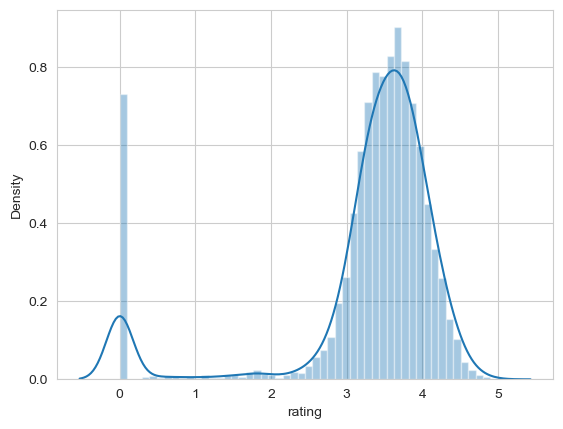

In [30]:
sns.set_style(style='whitegrid')
sns.distplot(df_rate['rating'])

#####  Conclusion - Almost more than 50 percent of restaurants has rating between 3 and 4. Restaurants having rating more than 4.5 are very rare.

# Top restaurant chains in Bengaluru

Text(0.5, 0, 'Number of outlets')

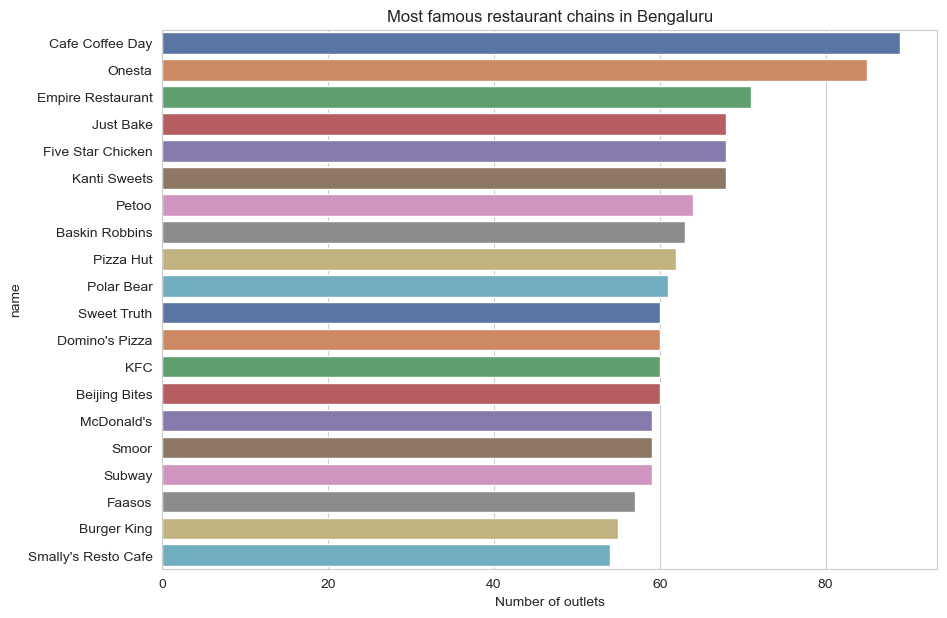

In [33]:
plt.figure(figsize=(10,7))
chains=df['name'].value_counts()[0:20]
sns.barplot(x=chains,y=chains.index,palette='deep') 
plt.title("Most famous restaurant chains in Bengaluru")
plt.xlabel("Number of outlets") 

# How many of the restaurants do not accept online orders

([<matplotlib.patches.Wedge at 0x2b85ba9dc90>,
 [Text(-0.481488774517003, 0.9890240442042423, ''),
  Text(0.5252605823084886, -1.0789352717716423, '')],
 [Text(-0.26263024064563795, 0.5394676604750411, '64.4%'),
  Text(0.30640200634661835, -0.629378908533458, '35.6%')])

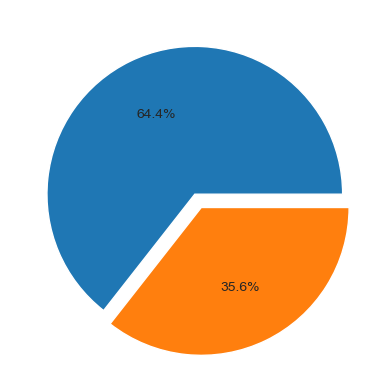

In [35]:
x=df['online_order'].value_counts()
labels=['accepted','not accepted']
plt.pie(x,explode=[0.0,0.1],autopct='%1.1f%%') #accepted=blue and not accepted=red

# Ratio b/w Restaurants that provide and do not provide table booking 

([<matplotlib.patches.Wedge at 0x2b85bab7290>,
 [Text(-0.9856961240827233, 0.4882654513359477, ''),
  Text(1.0753048626356982, -0.5326532196392153, '')],
 [Text(-0.537652431317849, 0.26632660981960776, '85.4%'),
  Text(0.6272611698708239, -0.31071437812287556, '14.6%')])

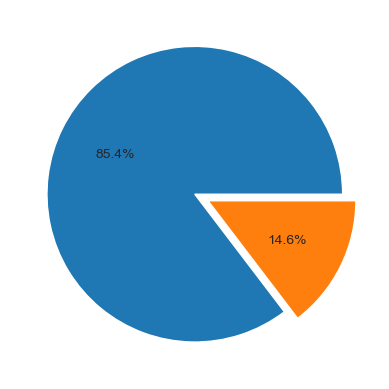

In [37]:
x=df['book_table'].value_counts()
labels=['not book','book']
plt.pie(x,explode=[0.0,0.1],autopct='%1.1f%%') #blue=not book

#### using plotly, What is the ratio b/w restaurants that provide and do not provide table booking ?

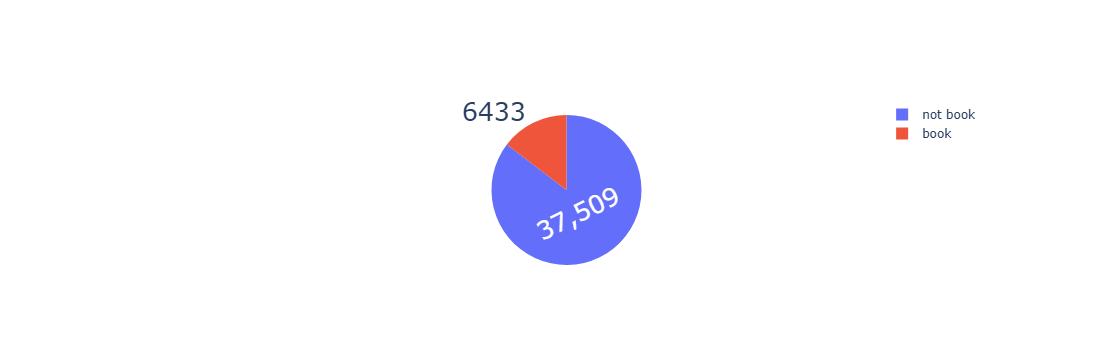

In [39]:
x=df['book_table'].value_counts()
labels=['not book','book']
trace=go.Pie(labels=labels, values=x,
               hoverinfo='label+percent', textinfo='value', 
               textfont=dict(size=25),
              pull=[0, 0, 0,0.2, 0]
               )
iplot([trace])

# Indepth Analysis on types of restaurants we have

In [41]:
df['rest_type'].isna().sum() #checking the null values

151

In [42]:
df['rest_type'].dropna(inplace=True) 

In [43]:
len(df['rest_type'].unique())

88

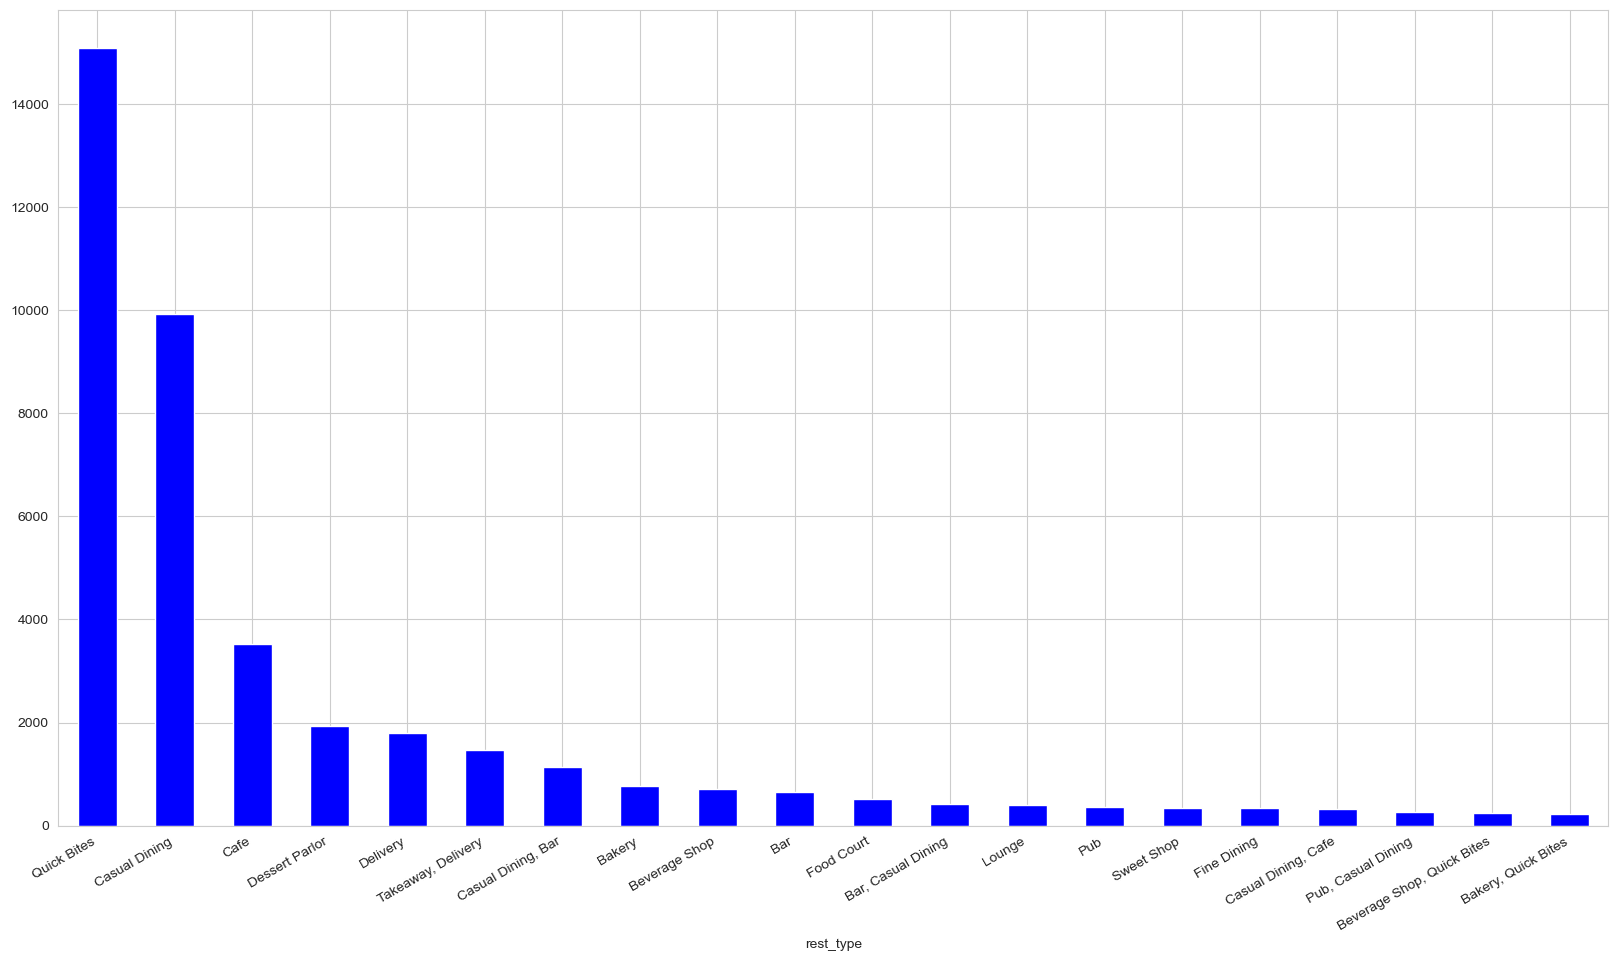

In [44]:
plt.figure(figsize=(20,12))
df['rest_type'].value_counts().nlargest(20).plot.bar(color='blue')
plt.gcf().autofmt_xdate()

#### using plotly

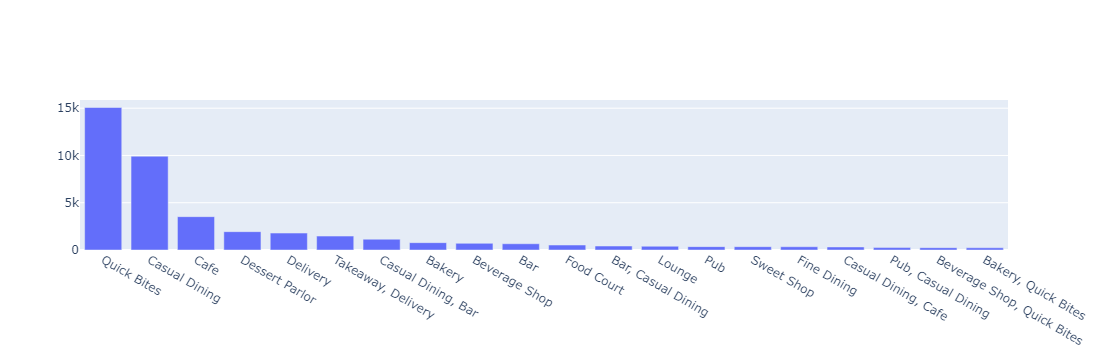

In [46]:
trace1 = go.Bar( 
        x = df['rest_type'].value_counts().nlargest(20).index,
        y = df['rest_type'].value_counts().nlargest(20),
        name= 'rest_type')
iplot([trace1])

# Highest Voted Restaurant

<Axes: xlabel='name'>

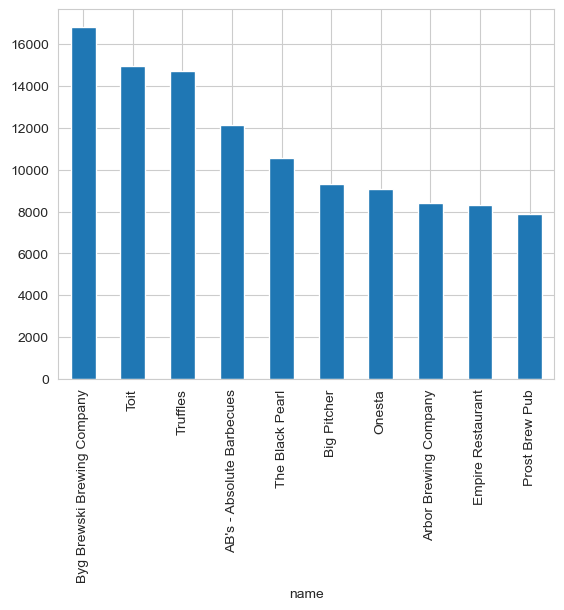

In [48]:
df.groupby('name')['votes'].max().nlargest(10).plot.bar()

#### using plotly to provide interactive graphs

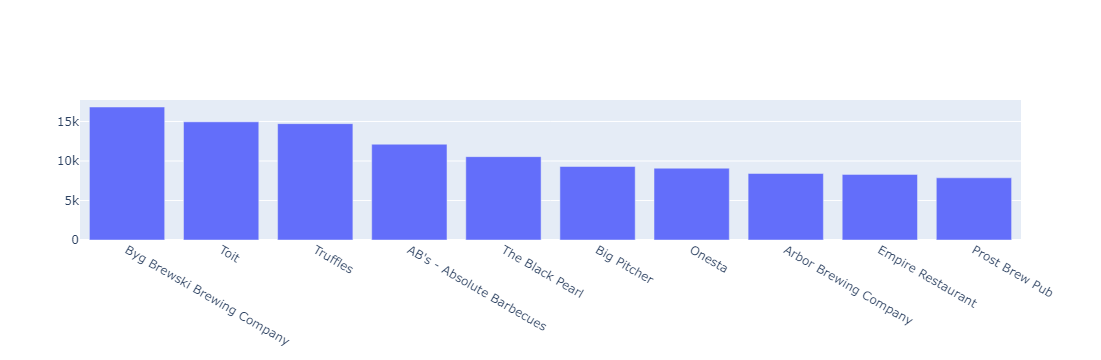

In [50]:
trace1 = go.Bar( 
        x = df.groupby('name')['votes'].max().nlargest(10).index,
        y = df.groupby('name')['votes'].max().nlargest(10),
        name= 'name')
iplot([trace1])

# Total restaurants at different locations of Bengaluru

In [52]:
df.groupby('location')['name'].unique()

location
BTM                  [Sankranthi Veg Restaurant, Hearts Unlock Cafe...
Banashankari         [Jalsa, Spice Elephant, San Churro Cafe, Addhu...
Banaswadi            [Cafe Nibras, The Sanctuary, Crunch Pizzas, Pi...
Bannerghatta Road    [Deja Vu Resto Bar, Fattoush, Empire Restauran...
Basavanagudi         [Grand Village, Timepass Dinner, Srinathji's C...
                                           ...                        
West Bangalore       [FreshMenu, Fit Dish Fetish, Garden City Mobil...
Whitefield           [Imperio Cafe, Night Diaries, LocalHost, AB's ...
Wilson Garden        [Tree Top, Sahana's (Nati Style), Karavali Kol...
Yelahanka            [Prashanth Naati Corner, Cheta's Kitchen, Twis...
Yeshwantpur          [Chef's Bank, New Agarwal Bhavan, Fishing Boat...
Name: name, Length: 92, dtype: object

In [53]:
restaurant=[] 
location=[]
for key,location_df in df.groupby('location'):
    location.append(key)
    restaurant.append(len(location_df['name'].unique()))

In [54]:
df_total=pd.DataFrame(zip(location,restaurant)) #creating data frame
df_total.columns=['location','restaurant']
df_total.set_index('location',inplace=True)
df_total.sort_values(by='restaurant').tail(10)

restaurant
location                     
Bellandur                 284
Jayanagar                 311
Bannerghatta Road         362
JP Nagar                  400
Indiranagar               467
Electronic City           518
Marathahalli              525
HSR                       553
BTM                       581
Whitefield                634

This shows Whitefield and BTM has the maximum number of restaurant

<Axes: xlabel='location'>

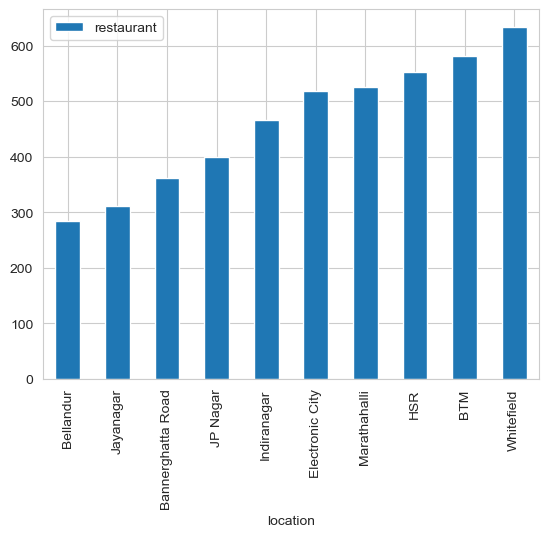

In [56]:
df_total.sort_values(by='restaurant').tail(10).plot.bar()


In [57]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                               0
votes                              0
phone                            832
location                           0
rest_type                        151
dish_liked                     20333
cuisines                          11
approx_cost(for two people)      252
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

# Different type of restaurants

In [59]:
#data is represented in form of percentage 
(df['rest_type'].value_counts()/len(df))*100

rest_type
Quick Bites                   34.302035
Casual Dining                 22.582040
Cafe                           8.026489
Dessert Parlor                 4.412635
Delivery                       4.075827
                                ...    
Bakery, Food Court             0.004551
Food Court, Beverage Shop      0.004551
Dessert Parlor, Food Court     0.004551
Dessert Parlor, Kiosk          0.004551
Quick Bites, Kiosk             0.002276
Name: count, Length: 87, dtype: float64

# Total number of variety of restaurants i.e., north indian,south Indian

Text(0.5, 1.0, 'Most popular cuisines of Bengaluru')

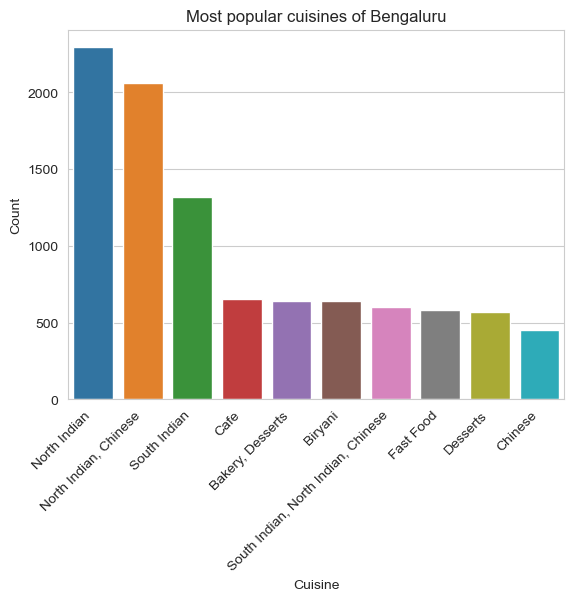

In [61]:

cuisines=df['cuisines'].value_counts()[:10]
sns.barplot( y=cuisines,x=cuisines.index)
plt.xlabel('Cuisine')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.title("Most popular cuisines of Bengaluru")

#### using plotly

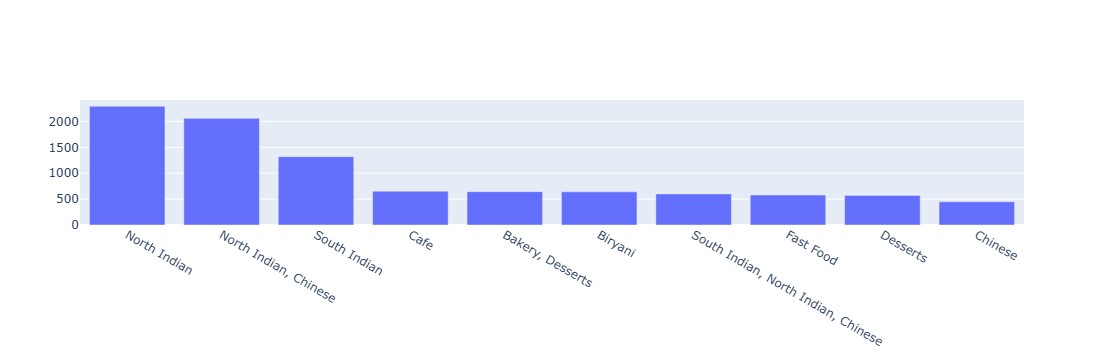

In [63]:
cuisines=df['cuisines'].value_counts()[:10]
trace1 = go.Bar( 
        x = cuisines.index,
        y = cuisines,
        name= 'Cuisines')
iplot([trace1])

### *We can observe that North Indian,chinese,South Indian and Biriyani are most common.*
### *It means Bengaluru is more influenced by North Indian culture more than South*

# Analyse approximate cost for two people

In [66]:
len(df['approx_cost(for two people)'].value_counts())

66

In [67]:
df['approx_cost(for two people)'].isna().sum()

252

In [68]:
df.dropna(axis='index',subset=['approx_cost(for two people)'],inplace=True) #to delete the missing values

In [69]:
df['approx_cost(for two people)'].isna().sum()

0

In [70]:
df['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '1,700', '1,400', '1,350', '2,200', '2,000',
       '1,800', '1,900', '180', '330', '2,500', '2,100', '3,000', '2,800',
       '3,400', '50', '40', '1,250', '3,500', '4,000', '2,400', '2,600',
       '1,450', '70', '3,200', '560', '240', '360', '6,000', '1,050',
       '2,300', '4,100', '120', '5,000', '3,700', '1,650', '2,700',
       '4,500'], dtype=object)

In [71]:
df['approx_cost(for two people)'].dtype #checking the data type

dtype('O')

In [72]:
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].apply(lambda x: x.replace(',','')) #to remove comma

In [73]:
df['approx_cost(for two people)']=df['approx_cost(for two people)'].astype(int) #data tyoe is changed from object to int

<Axes: xlabel='approx_cost(for two people)', ylabel='Density'>

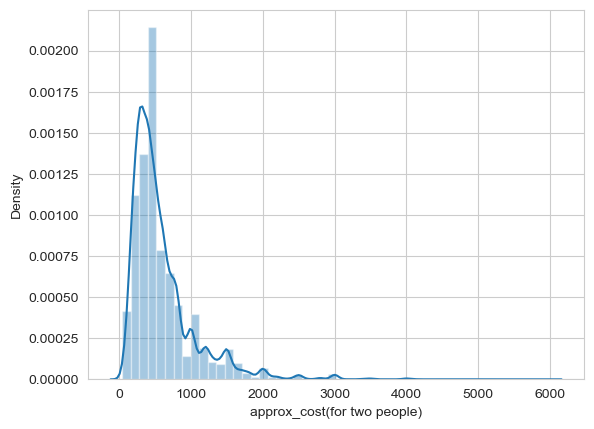

In [74]:
sns.distplot(df['approx_cost(for two people)'])

about 50% of the restaurants are affordable in Bengaluru

# Analysing relation between approx_cost(for two people) and rating

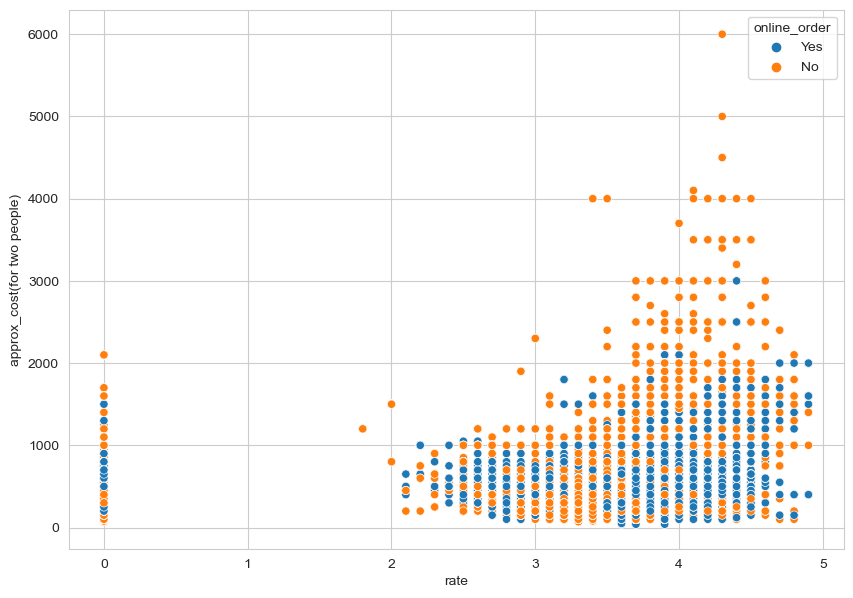

In [77]:
plt.figure(figsize=(10,7))
sns.scatterplot(x="rate",y='approx_cost(for two people)',hue='online_order',data=df)
plt.show()

##### from this scattterplot,we can come up with a conclusion that most of the highest rated accepts online order and they are in budget too

In [79]:
df.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table  rate  votes                             phone  \
0          Yes        Yes   4.1    775    080 42297555\r\n+91 9743772233   
1          Yes         No   4.1    787                      080 41714161   
2          Yes         No   3.8    918                    +91 9663487993   
3           No         No   3.7     88                    +91 9620009302   
4           No         No   3.8    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines  approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                          800   
1     Chinese, North Indian, Thai                          800   
2          Cafe, Mexican, Italian                          800   
3      South Indian, North Indian                          300   
4        North Indian, Rajasthani                          600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

# Analysing the affects of votes on the basis of the fact that a restaurant is accepting the orders online or not.

<Axes: xlabel='online_order', ylabel='votes'>

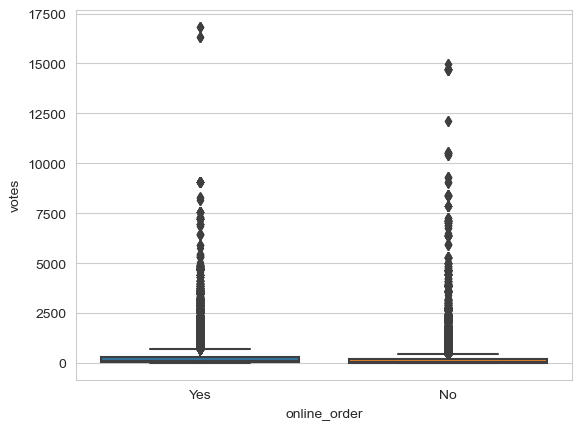

In [81]:
sns.boxplot(x='online_order',y='votes',data=df)

#### from this boxplot,we can observe that median number of votes for both categories vary.
#### Restaurants accepting online orders get more votes from customers as there is a rating option poping up after each order through zomato application.

# Analysing the affects of price on the basis of the fact that a restaurant is accepting the orders online or not.

<Axes: xlabel='online_order', ylabel='approx_cost(for two people)'>

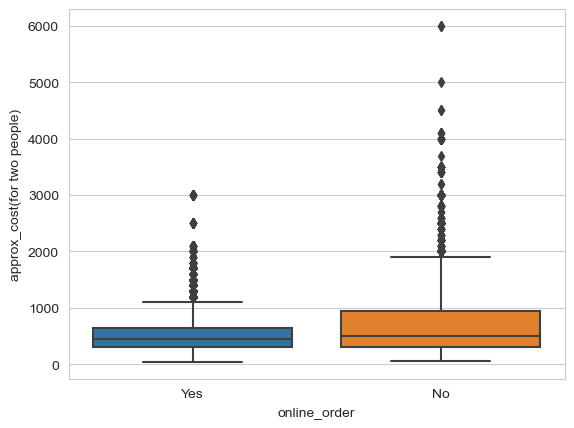

In [84]:
sns.boxplot(x='online_order',y='approx_cost(for two people)',data=df)

#### using plotly

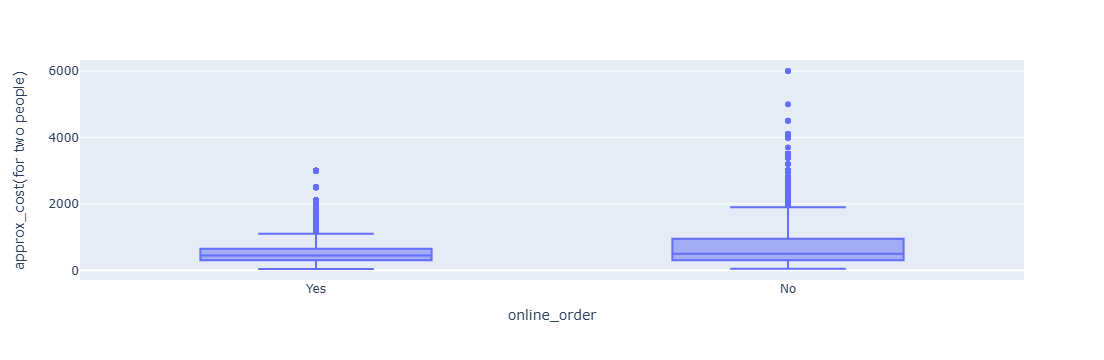

In [86]:
fig = px.box(df,x='online_order',y='approx_cost(for two people)')
fig.show()

# Cheapest Restaurants in Bengaluru

In [88]:
df['approx_cost(for two people)'].min()

40

# Expensive Restaurants in Bengaluru

In [90]:
df['approx_cost(for two people)'].max()

6000

In [91]:
df[df['approx_cost(for two people)']==6000]['name']

19139    Le Cirque Signature - The Leela Palace
45618    Le Cirque Signature - The Leela Palace
Name: name, dtype: object

# Distribution of cost for two people

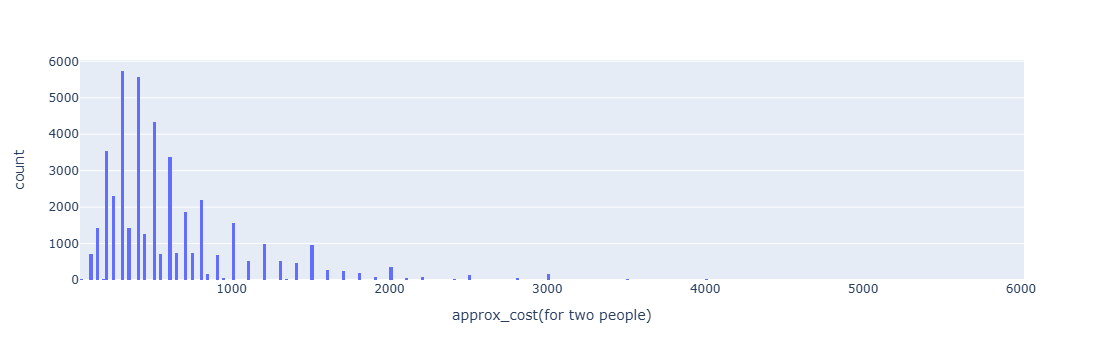

In [93]:
px.histogram(df, x="approx_cost(for two people)")

##### most of the price lies between in a range of under 1000,it means most are affordable & very few are luxurious

# Most costly Rate for 2 people is served at which Restaurant what exactly is the dish involved in this and liked dish of that restaurant

In [96]:
df[df['approx_cost(for two people)']==6000].loc[:,('name','cuisines','dish_liked')]

name         cuisines  \
19139  Le Cirque Signature - The Leela Palace  French, Italian   
45618  Le Cirque Signature - The Leela Palace  French, Italian   

                                              dish_liked  
19139  Wine, Asparagus Soup, Creme Brulee, Pasta, Rav...  
45618  Wine, Asparagus Soup, Creme Brulee, Pasta, Rav...

In [97]:
df[df['approx_cost(for two people)']==6000][['name','cuisines','dish_liked']]

name         cuisines  \
19139  Le Cirque Signature - The Leela Palace  French, Italian   
45618  Le Cirque Signature - The Leela Palace  French, Italian   

                                              dish_liked  
19139  Wine, Asparagus Soup, Creme Brulee, Pasta, Rav...  
45618  Wine, Asparagus Soup, Creme Brulee, Pasta, Rav...

In [98]:
data=df.copy()

In [99]:
data.dtypes

url                             object
address                         object
name                            object
online_order                    object
book_table                      object
rate                           float64
votes                            int64
phone                           object
location                        object
rest_type                       object
dish_liked                      object
cuisines                        object
approx_cost(for two people)      int32
reviews_list                    object
menu_item                       object
listed_in(type)                 object
listed_in(city)                 object
dtype: object

In [100]:
data.set_index('name',inplace=True)

# Top 10 Most Expensive restaurant with approx cost for 2 people

<Axes: xlabel='name'>

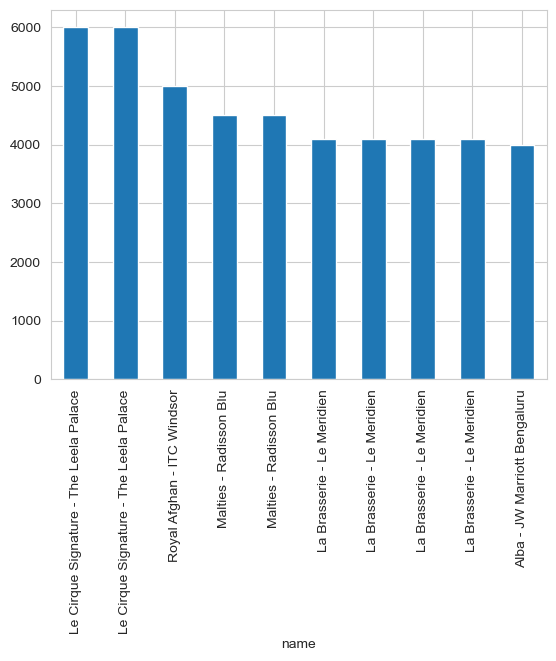

In [102]:
data['approx_cost(for two people)'].nlargest(10).plot.bar()

#### using plotly

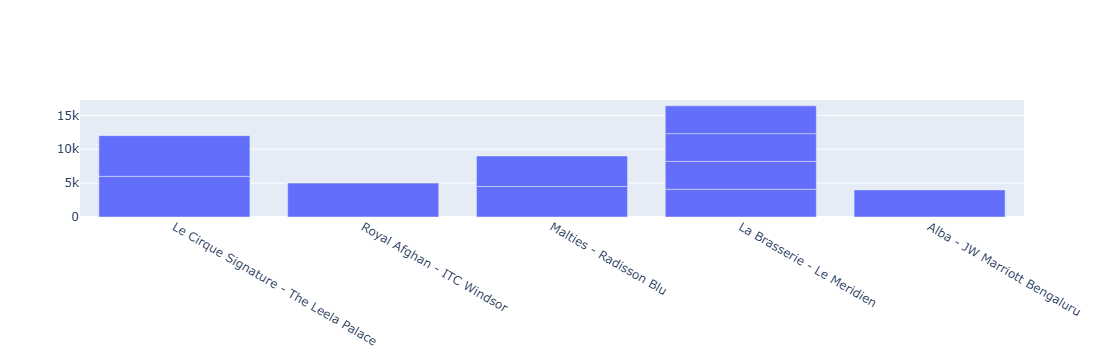

In [104]:
trace1 = go.Bar( 
        x = data['approx_cost(for two people)'].nlargest(10).index,
        y = data['approx_cost(for two people)'].nlargest(10),
        name= 'Priority')
iplot([trace1])

# Top 10 Cheapest restaurant with approx cost for 2 people

<Axes: xlabel='name'>

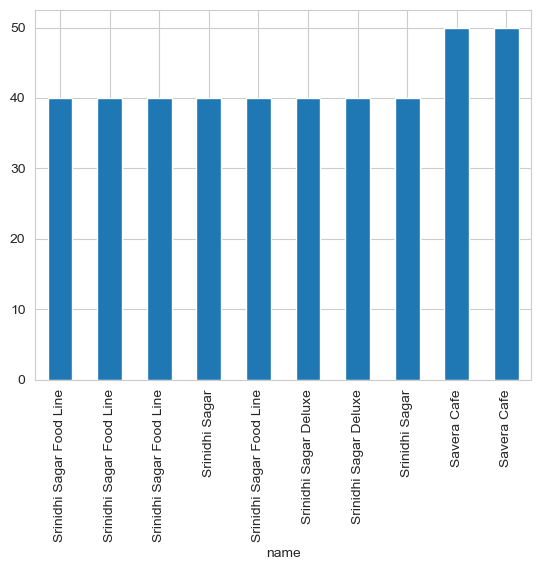

In [106]:
data['approx_cost(for two people)'].nsmallest(10).plot.bar()

#### using plotly

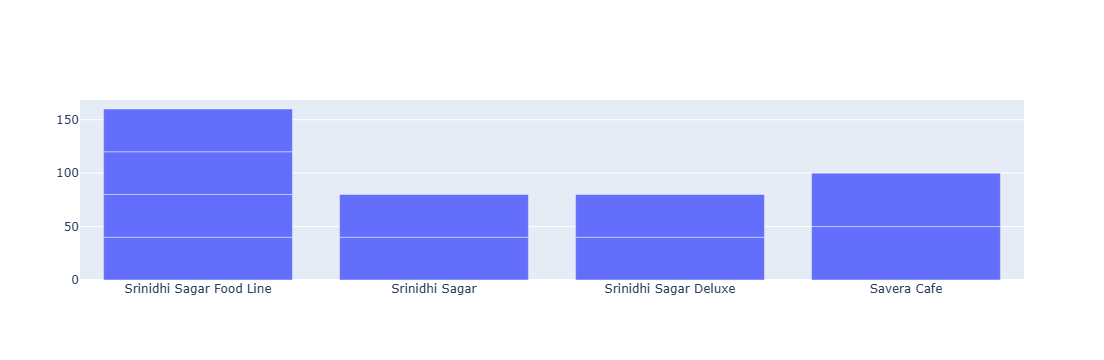

In [108]:
trace1 = go.Bar( 
        x = data['approx_cost(for two people)'].nsmallest(10).index,
        y = data['approx_cost(for two people)'].nsmallest(10),
        name= 'Priority')
iplot([trace1])

# All the restautant that are below than 500(budget hotel)

In [110]:
data[data['approx_cost(for two people)']<=500]

url  \
name                                                                                                    
Addhuri Udupi Bhojana                               https://www.zomato.com/bangalore/addhuri-udupi...   
CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Down The Alley  https://www.zomato.com/bangalore/caf%C3%A9-dow...   
The Coffee Shack                                    https://www.zomato.com/bangalore/the-coffee-sh...   
Caf-Eleven                                          https://www.zomato.com/bangalore/caf-eleven-ba...   
T3H Cafe                                            https://www.zomato.com/bangalore/t3h-cafe-bana...   
...                                                                                               ...   
Venice Kerala Restaurant                            https://www.zomato.com/bangalore/venice-kerala...   
Thai & Chinese Fast Food                            https://www.zomato.com/bangalore/thai-chinese-...   
The Crunch                                          https://www.zomato.com/bangalore/the-crunch-br...   
Punjabi Charchay                                    https://www.zomato.com/bangalore/punjabi-charc...   
Raapchick                                           https://www.zomato.com/bangalore/raapchick-bro...   

                                                                                              address  \
name                                                                                                    
Addhuri Udupi Bhojana                               1st Floor, Annakuteera, 3rd Stage, Banashankar...   
CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Down The Alley  12,29 Near PES University Back Gate, D'Souza N...   
The Coffee Shack                                        6th Block, 3rd Stage, Banashankari, Bangalore   
Caf-Eleven                                          111, Sapphire Toys Building, 100 Feet Ring Roa...   
T3H Cafe                                            504, CJ Venkata Das Road, Padmanabhangar, 2nd ...   
...                                                                                               ...   
Venice Kerala Restaurant                            Opposite Brookfield Mall, Shiva Temple Road, B...   
Thai & Chinese Fast Food                            7, Anurhh Arcade, Hoodi Road, Kodigehalli Road...   
The Crunch                                            33/1, Kundalahalli Road, Brookefield, Bangalore   
Punjabi Charchay                                    7, Anurhh Arcade, Hoodi Road, Kodigehalli Road...   
Raapchick                                           Opposite Brookefield Mall, Kundanhalli, Brooke...   

                                                   online_order book_table  \
name                                                                         
Addhuri Udupi Bhojana                                        No         No   
CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Down The Alley          Yes         No   
The Coffee Shack                                            Yes        Yes   
Caf-Eleven                                                   No         No   
T3H Cafe                                                     No         No   
...                                                         ...        ...   
Venice Kerala Restaurant                                     No         No   
Thai & Chinese Fast Food                                     No         No   
The Crunch                                                   No         No   
Punjabi Charchay                                             No         No   
Raapchick                                                   Yes         No   

                                                    rate  votes  \
name                                                              
Addhuri Udupi Bhojana                                3.7     88   
CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Down The Alley   4.1    402   
The Coffee Shack                                     4.2    164   
Caf-Eleven      

In [111]:
df_budget=data[data['approx_cost(for two people)']<=500].loc[:,('approx_cost(for two people)')]
df_budget=df_budget.reset_index()
df_budget.head()

name  \
0                              Addhuri Udupi Bhojana   
1  CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Down The A...   
2                                   The Coffee Shack   
3                                         Caf-Eleven   
4                                           T3H Cafe   

   approx_cost(for two people)  
0                          300  
1                          500  
2                          500  
3                          450  
4                          300

<Axes: xlabel='approx_cost(for two people)'>

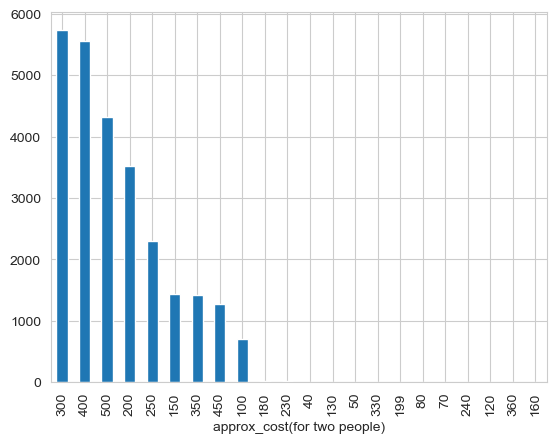

In [112]:
df_budget['approx_cost(for two people)'].value_counts().plot.bar()

#### using plotly

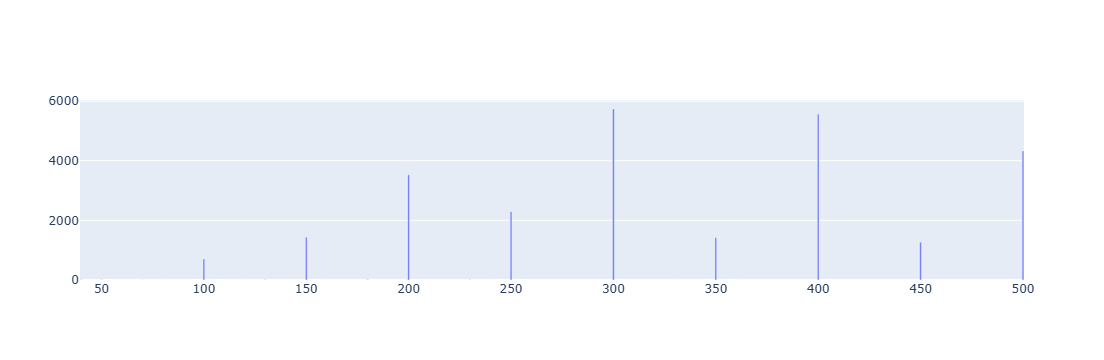

In [114]:
trace1 = go.Bar( 
        x = df_budget['approx_cost(for two people)'].value_counts().index,
        y = df_budget['approx_cost(for two people)'].value_counts(),
        name= 'Priority')
iplot([trace1])

### we can conclude that 300 and 400 cost dishes are maximum in count

# Restaurants that have better rating >4 and that are under budget too

In [117]:
df[(df['rate']>=4) & (df['approx_cost(for two people)']<=500)].shape


(4007, 17)

###### Total no. of Restaurants that have better rating >4 and that are under budget too ie less than 500

In [119]:
df_new=df[(df['rate']>=4) & (df['approx_cost(for two people)']<=500)]
len(df_new['name'].unique())

628

# Total such various  affordable hotels at different location

In [121]:
location=[]
total=[]
for loc,location_df in df_new.groupby('location'):
    location.append(loc)
    total.append(len(location_df['name'].unique()))
    
    

In [122]:
len(location)

68

In [123]:
len(total)

68

In [124]:
location_df=pd.DataFrame(zip(location,total))
location_df.columns=['location','restaurant']
location_df.set_index('location',inplace=True)


In [125]:
location_df.head(20)

restaurant
location                      
BTM                         54
Banashankari                25
Banaswadi                    3
Bannerghatta Road           19
Basavanagudi                31
Basaveshwara Nagar           3
Bellandur                   20
Brigade Road                11
Brookefield                 16
Church Street                8
City Market                  1
Commercial Street            4
Cunningham Road              4
Domlur                       5
Ejipura                      1
Electronic City             23
Frazer Town                 15
HBR Layout                   3
HSR                         58
Hebbal                       1

In [126]:
type(location)

list

Text(0, 0.5, 'Total restaurants')

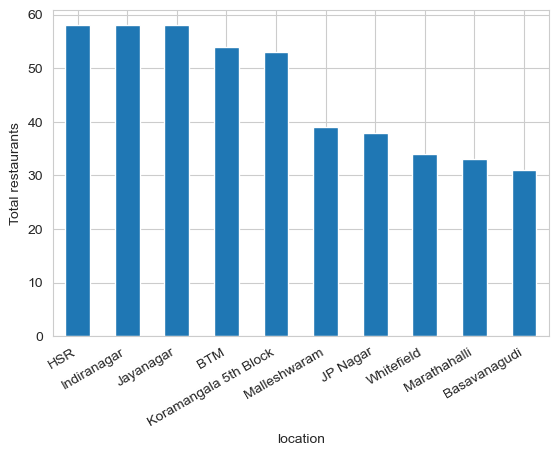

In [127]:

location_df['restaurant'].nlargest(10).plot.bar()
plt.gcf().autofmt_xdate()
plt.ylabel('Total restaurants')

# To Visualise what are the names of those affordable restaurants


In [129]:
location=[]
total=[]
for loc,location_df in df_new.groupby('location'):
    location.append(loc)
    total.append(location_df['name'].unique())
    

In [130]:
afford=pd.DataFrame(zip(location,total))
afford.columns=['location','res_names']
afford.set_index('location',inplace=True)
afford.head()

res_names
location                                                            
BTM                [eat.fit, Hiyar Majhe Kolkata, XO Belgian Waff...
Banashankari       [CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Down The ...
Banaswadi          [Pooja Dosa Camp, Corner House Ice Cream, The ...
Bannerghatta Road  [BOX8- Desi Meals, Krishna Kuteera, Krishna Ku...
Basavanagudi       [Kabab Magic, Sri Guru Kottureshwara Davangere...

# Finding best budget restaurants in any location

###### we will pass location and restaurant type as parameteres,function will return name of restaurants.

In [133]:
def return_budget(location,restaurant):
    budget=df[(df['approx_cost(for two people)']<=400) & (df['location']==location) & 
                     (df['rate']>4) & (df['rest_type']==restaurant)]
    return(budget['name'].unique())

In [134]:
return_budget('BTM',"Quick Bites")

array(['Swadista Aahar', 'Litti Twist', 'The Shawarma Shop', 'Gorbandh',
       'Yum In My Tum', 'Chaatimes', "Muthashy's", 'Swad Punjab Da',
       "Domino's Pizza", 'Roti Wala', 'Andhra Kitchen'], dtype=object)

# Foodie Areas in Bengaluru

Text(0.5, 1.0, 'Top 20 Restaurant Locations')

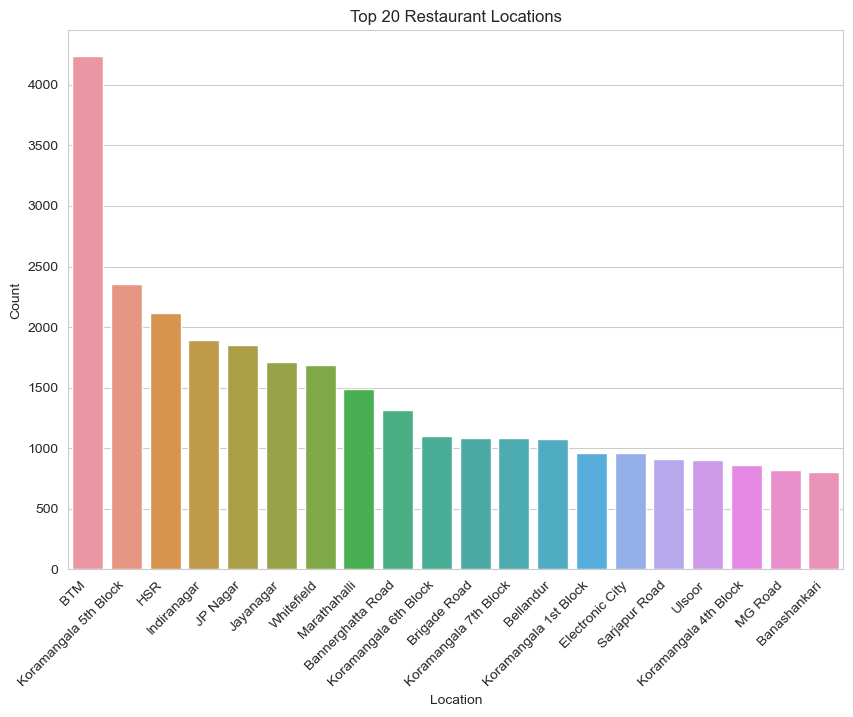

In [136]:
plt.figure(figsize=(10,7))
Restaurant_locations=df['location'].value_counts()[:20]
sns.barplot(x=Restaurant_locations.index, y=Restaurant_locations)
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.title("Top 20 Restaurant Locations")

#### using plotly

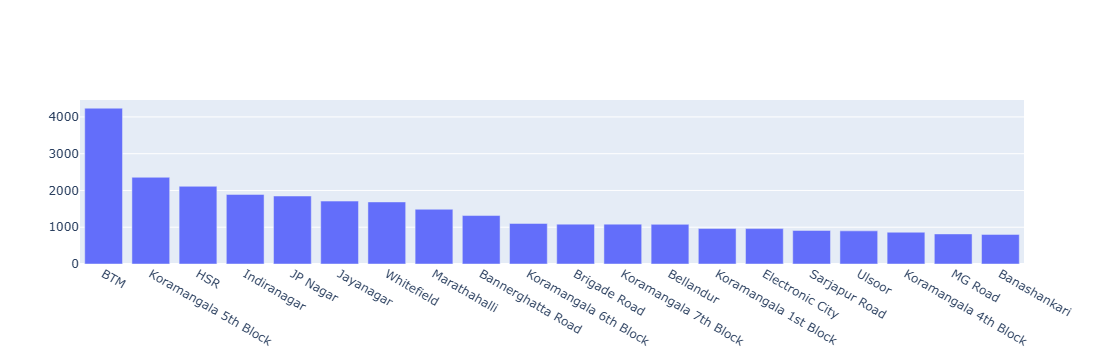

In [138]:
Restaurant_locations=df['location'].value_counts()[:20]
trace1 = go.Bar( 
        x = Restaurant_locations.index,
        y = Restaurant_locations,
        name= 'Priority')
iplot([trace1])

#### We can see that BTM,HSR and Koranmangala 5th block has the most number of restaurants.
#### BTM dominates the section by having more than 4000 restaurants.

## **Insights of Analysis:**

#### 1.Calculating Average Rating of each restaurant
#### 2.Get distribution of rating column and try to find out what distribution this feature support
#### 3.Top restaurant chains in Bengaluru
#### 4.How many of the restaurants do not accept online orders
#### 5.Ratio b/w Restaurants that provide and do not provide table booking
#### 6.In-depth Analysis on types of restaurants we have
#### 7.Highest Voted Restaurant
#### 8.Total restaurants at different locations of Bangalore
#### 9.Different type of restaurants
#### 10.Total number of variety of restaurants i.e., North Indian, South Indian
#### 11.Analyse approximate cost for two people
#### 12.Analysing relation between approximate cost(for two people) and rating
#### 13.Analysing the affects of votes on the basis of the fact that a restaurant is accepting the orders online or not.
#### 14.Analysing the affects of price on the basis of the fact that a restaurant is accepting the orders online or not.
#### 15.Cheapest Restaurants in Bangalore
#### 16.Expensive Restaurants in Bengaluru
#### 17.Distribution of cost for two people
#### 18.Most costly Rate for 2 people is served at which Restaurant what exactly is the dish involved in this and liked dish of that restaurant.
#### 19.Top 10 Most Expensive restaurant with approximate cost for 2 people
#### 20.Top 10 Cheapest restaurant with approximate cost for 2 people
#### 21.All the restaurant that are below than 500(budget hotel)
#### 22.Restaurants that have better rating >4 and that are under budget too
#### 23.Total such various affordable hotels at different location
#### 24.To Visualise what are the names of those affordable Restaurants
#### 25.Finding Best budget Restaurants in any location
#### 26.Foodie Areas in Bengaluru